### HOMEWORK 5- Programming Lab

#### 1)

##### i)

Since cycling through all the coordinates takes more time, we will be choosing a random coordinate, and we will continue to move in the negative gradient until convergence. 

##### ii)

W(i) will be updated by moving in the direction of the negative gradient, and it will be updated to the parameters that make the loss function zero (or as close as possible). 

#### a)

##### Short, high level description of your coordinate descent method

This notebook showcases two different approaches to implementing coordinate descent on model:
-Randomly optimize along a random coordinate.
-Optimize along coordinate with the largest gradient in magnitude
I used log_loss from sklearn for L(w).

1. Initialize weights to zero

2. Get predictions from the (1 / (1- exp(-x*w) ) function

3. Calculate loss and gradients

4. Find Coordinate i with the largest gradient in absolute value (best coordinate descent) or randomly choose weight (random coordinate descent)

5. Update weight using: w[i] = w[i] - n* (dL(w)/dw)
 
6. Repeat (1) - (5) until convergence


Coordinate descent works with any loss function, it does not need to be diferrentiable at all points. This is because in coordinate descent we are updating one coordinate at a time, instead of updating all coordinates at once.

#### b)

##### Convergence
The method will converge when the loss is at or below the convergence treshold which should be close to zero. We also need to be careful to choose an n, step size, that is optimal to not overeshoot the optimal solution. 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from random import randint

In [20]:
#load data 
df = pd.read_csv("C:/Users/mary0/Masters- Data Science/Winter 2023/255R/Week4/heart.csv")
X = df.drop("target", axis=1)
y = df["target"]

# logistic regression model
reg = LogisticRegression(max_iter = 10000).fit(X, y)

# values of b and w
b = reg.intercept_[0]
w = reg.coef_[0]
params = np.concatenate((w, b.reshape(1)))

preds = reg.predict_proba(X)
L_star = log_loss(y, preds)

In [21]:
print("Loss L* ={}".format(L_star) )

Loss L* =0.35010636303140485


In [46]:
def add_bias(X):
    ones = np.ones((X.shape[0], 1))
    return np.hstack((ones, X))

X = add_bias(X)
params = np.zeros(X.shape[1])

def predict(w, x):
    return 1 / ( 1 + np.exp(-np.dot(x , w) ) )

def calculate_loss(y, w, x): 
    preds = predict(w, x)
    return log_loss(y, preds)

def add_or_sub(w, x, y, prev_loss, j, amount):
    w_minus = w.copy()
    w_minus[j] -= amount
    loss_minus = calculate_loss(y, w_minus, x)
    
    w_plus = w.copy()
    w_plus[j] += amount
    loss_plus = calculate_loss(y, w_plus, x)
    
    if loss_minus < prev_loss:
        return -1
    elif loss_plus < prev_loss: 
        return 1 
    else:
        return 0


In [140]:
def random_coordinate_descent(X, y, params, learning_rate=0.01, epochs=100):
    losses = []
    for epoch in range(int(epochs)):
        j = np.random.randint(0, len(params))
        direction = add_or_sub(params, X, y, calculate_loss(y, params, X), j, learning_rate)
        params[j] += direction * learning_rate
        current_loss = calculate_loss(y, params, X)
        losses.append(current_loss)
    return params, losses

params, losses = random_coordinate_descent(X, y, params)
random_coor = losses

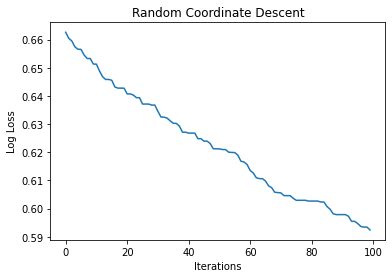

In [141]:
plt.plot(range(len(losses)), losses)
plt.title('Random Coordinate Descent')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.show()

Instead of choosing a random coordinate, we choose the coordinate with the largest gradient in magnitude

In [144]:
def gradient_descent(X, y, params, learning_rate=0.01, epochs=100):
    losses = []
    for epoch in range(int(epochs)):
        gradients = []
        for j in range(len(params)):
            direction = add_or_sub(params, X, y, calculate_loss(y, params, X), j, learning_rate)
            gradient = learning_rate * direction
            gradients.append(gradient)
        j = np.argmax(np.abs(gradients))
        params[j] += gradients[j]
        current_loss = calculate_loss(y, params, X)
        losses.append(current_loss)
    return params, losses

params, losses = gradient_descent(X, y, np.zeros(X.shape[1]))
largest_gradient = losses

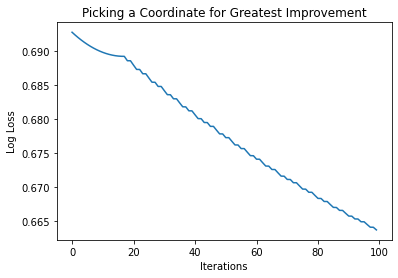

In [145]:
plt.plot(range(len(losses)), losses)
plt.title('Picking a Coordinate for Greatest Improvement')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.show()

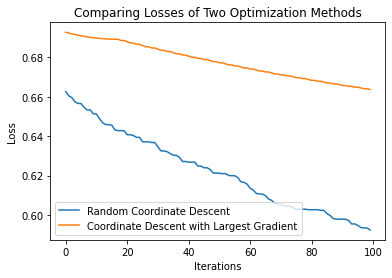

In [149]:
plt.plot(random_coor, label='Random Coordinate Descent')
plt.plot(largest_gradient, label='Coordinate Descent with Largest Gradient')
plt.legend(loc='lower left')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Comparing Losses of Two Optimization Methods')
plt.show()